   Data.Precipitation Date.Full  Date.Month  Date.Week of  Date.Year  \
0                0.00  1/3/2016           1             3       2016   
1                0.00  1/3/2016           1             3       2016   
2                0.16  1/3/2016           1             3       2016   
3                0.00  1/3/2016           1             3       2016   
4                0.01  1/3/2016           1             3       2016   

  Station.City Station.Code Station.Location Station.State  \
0   Birmingham          BHM   Birmingham, AL       Alabama   
1   Huntsville          HSV   Huntsville, AL       Alabama   
2       Mobile          MOB       Mobile, AL       Alabama   
3   Montgomery          MGM   Montgomery, AL       Alabama   
4    Anchorage          ANC    Anchorage, AK        Alaska   

   Data.Temperature.Avg Temp  Data.Temperature.Max Temp  \
0                         39                         46   
1                         39                         47   
2                

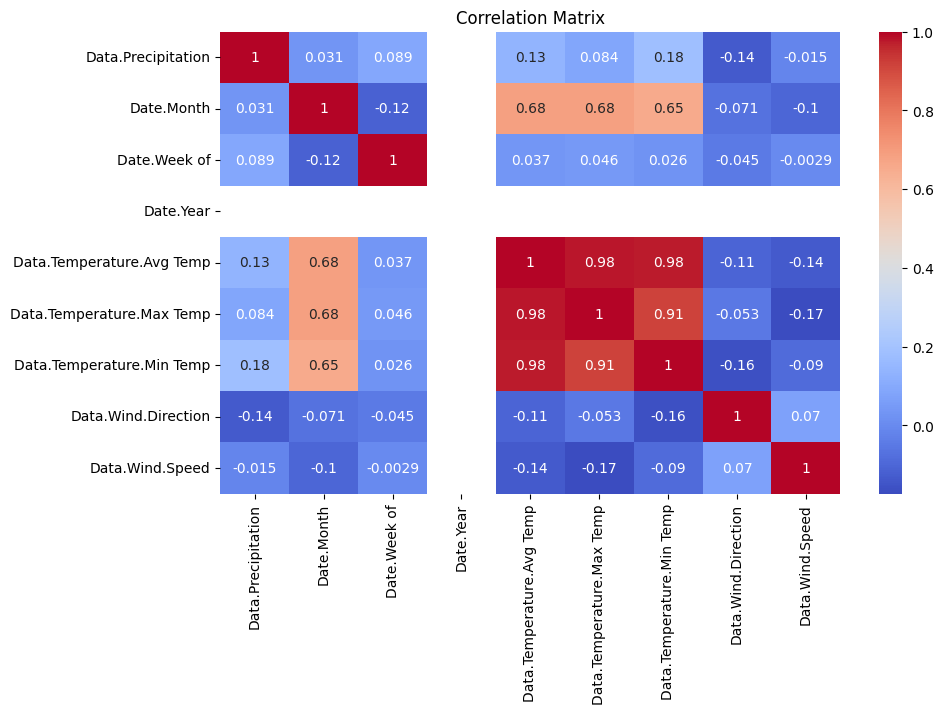

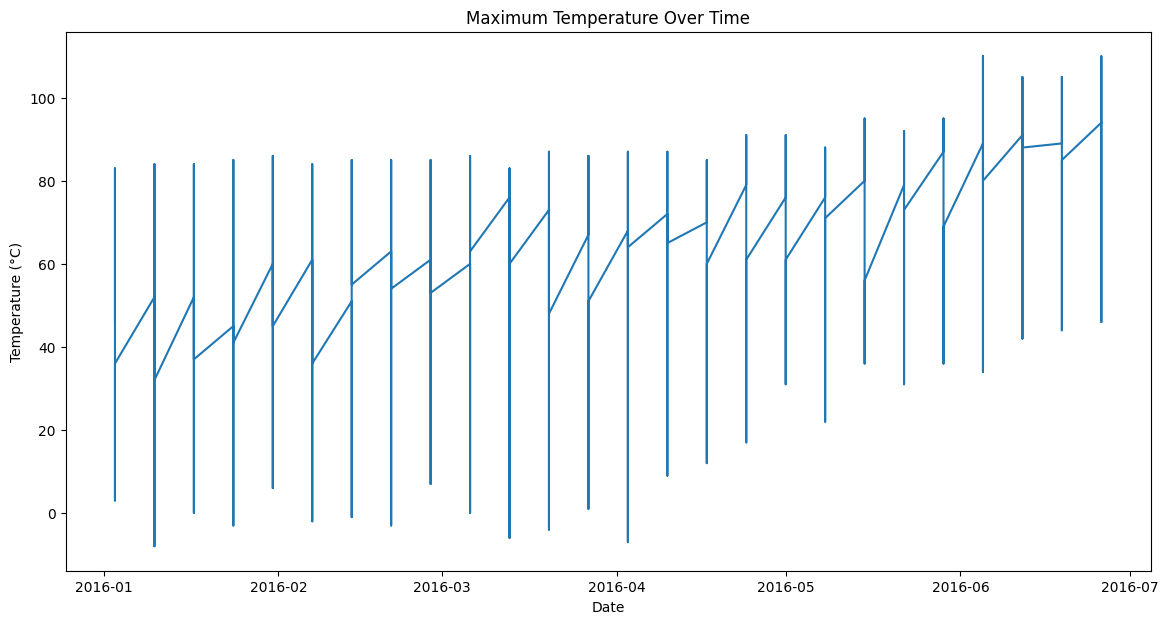

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load weather data from a CSV file
data = pd.read_csv('/content/historical_temperature_data.csv')

# Display the first few rows
print(data.head())

# Summary statistics
print(data.describe())

# Convert the 'Date.Full' column to datetime
data['Date.Full'] = pd.to_datetime(data['Date.Full'])

# Rename columns for easier reference (if necessary)
# For example: data.rename(columns={'Data.Temperature.Avg Temp': 'Temperature'}, inplace=True)

# Correlation matrix to understand the relationships between numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Time series analysis: Plot temperature over time
plt.figure(figsize=(14, 7))
plt.plot(data['Date.Full'], data['Data.Temperature.Max Temp'])
plt.title('Maximum Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()


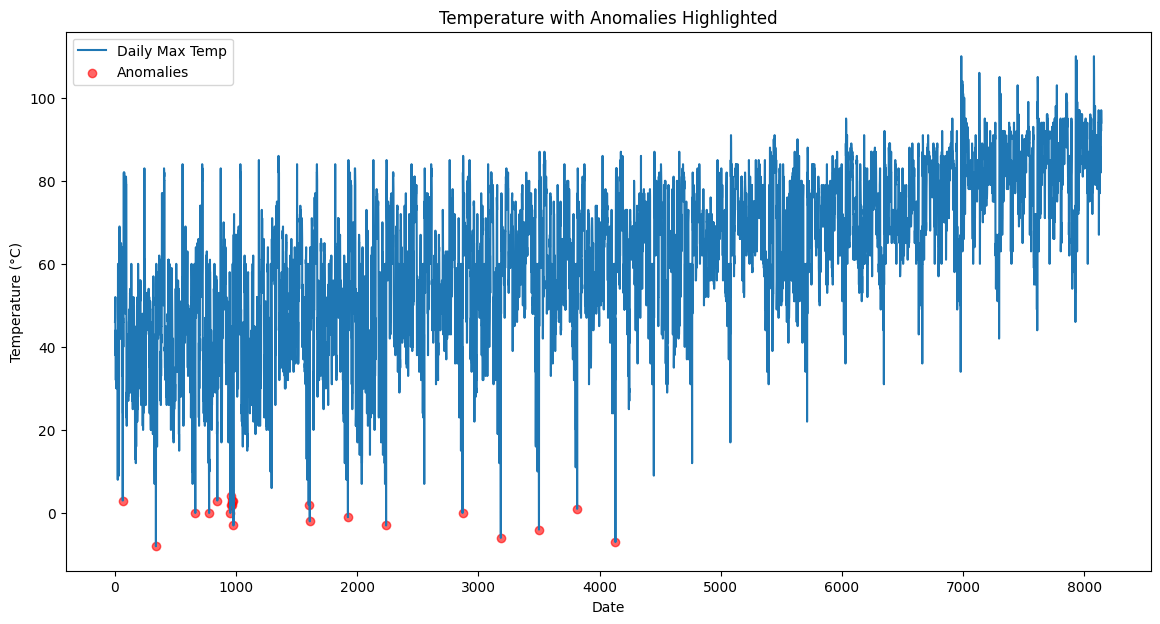

In [3]:
from scipy import stats

# Calculate z-scores for temperature
data['Temperature_Z'] = stats.zscore(data['Data.Temperature.Max Temp'])

# Filter out anomalies (e.g., z-score > 3 or < -3)
anomalies = data[np.abs(data['Temperature_Z']) > 3]

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Data.Temperature.Max Temp'], label='Daily Max Temp')
plt.scatter(anomalies.index, anomalies['Data.Temperature.Max Temp'], color='red', label='Anomalies', alpha=0.6)
plt.title('Temperature with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


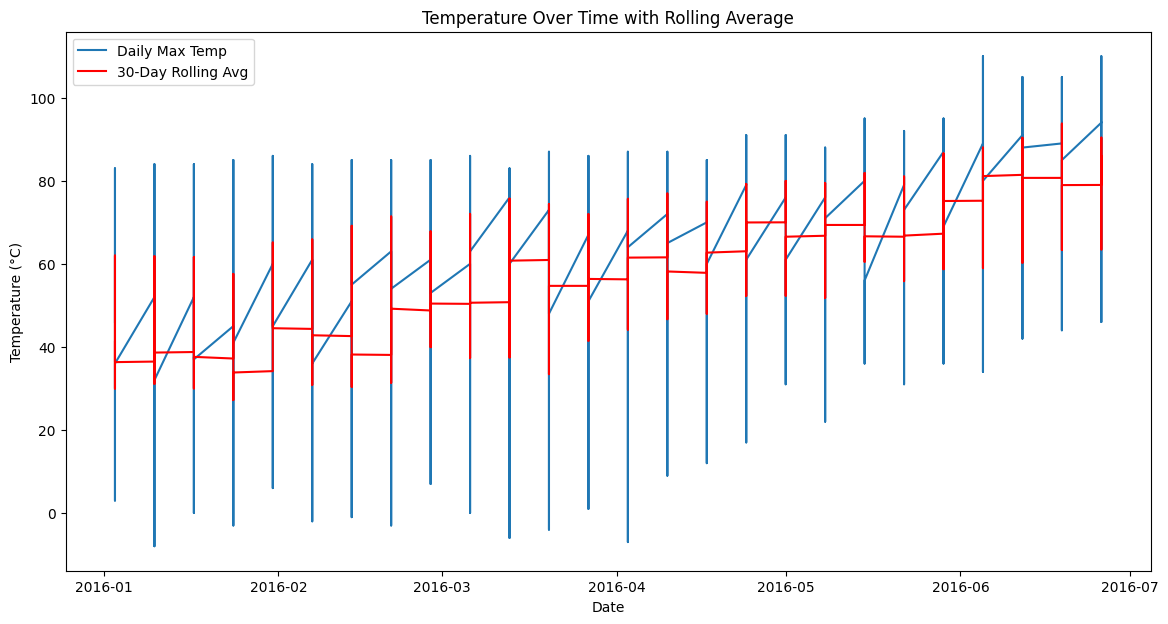

In [4]:
data.set_index('Date.Full', inplace=True)
data['Rolling_Max_Temperature'] = data['Data.Temperature.Max Temp'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Data.Temperature.Max Temp'], label='Daily Max Temp')
plt.plot(data.index, data['Rolling_Max_Temperature'], color='red', label='30-Day Rolling Avg')
plt.title('Temperature Over Time with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


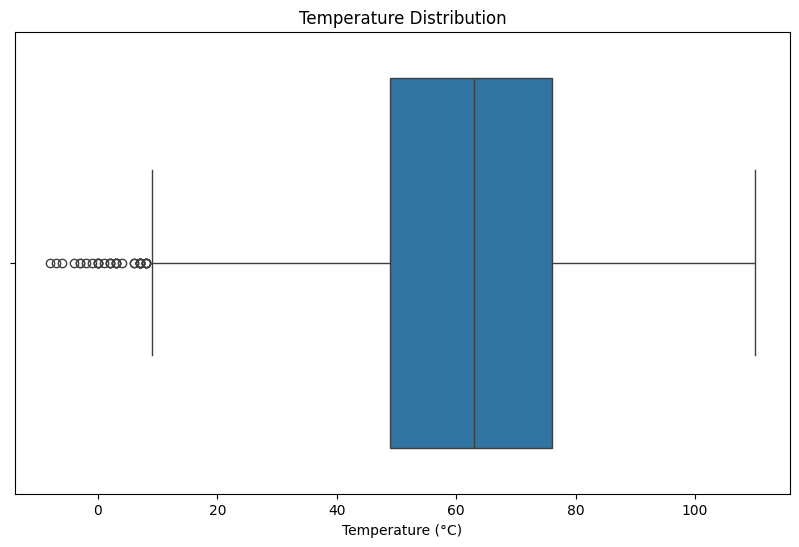

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Data.Temperature.Max Temp'])
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.show()


In [6]:
print(data.index.min(), data.index.max())


2016-01-03 00:00:00 2016-06-26 00:00:00


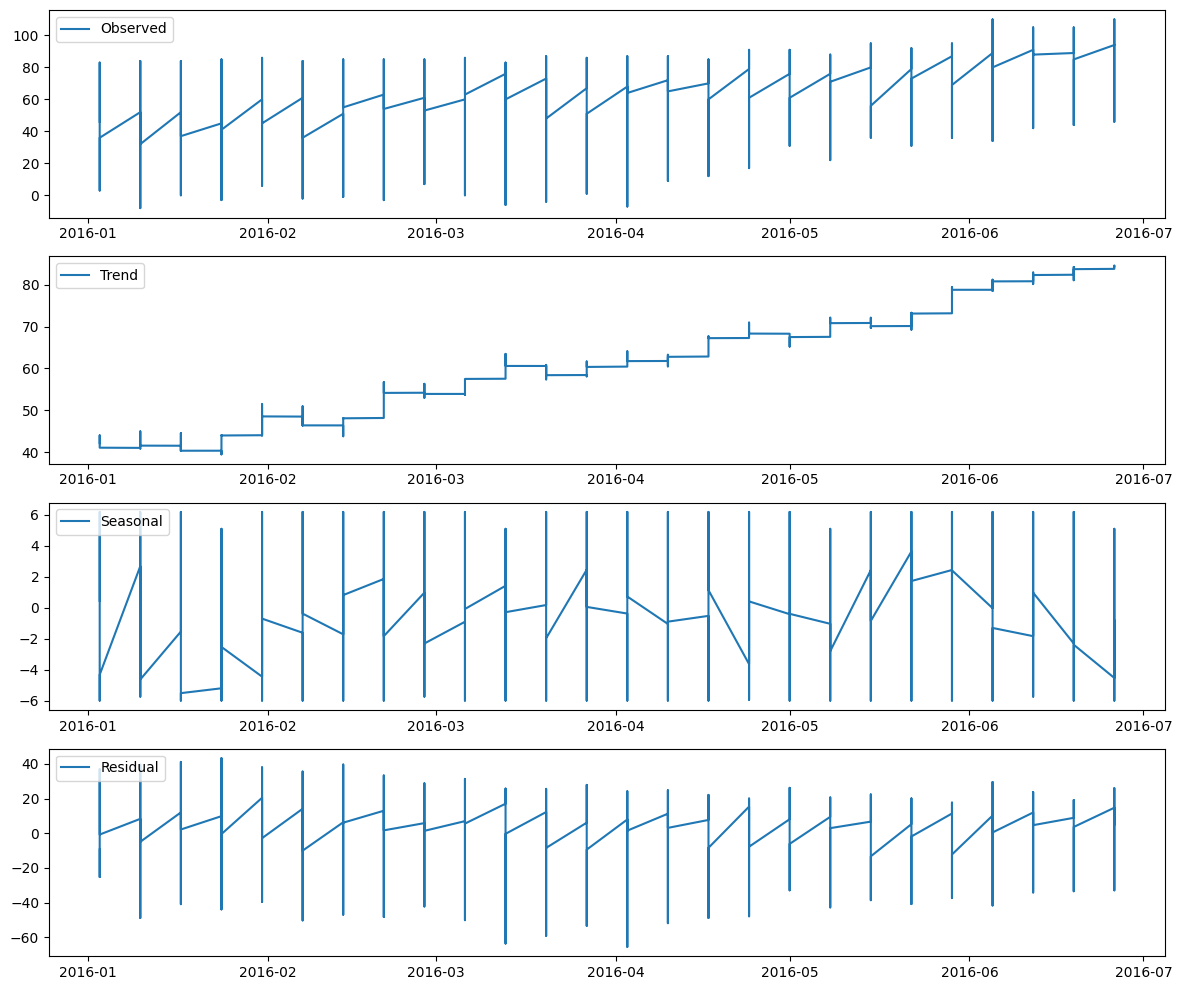

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Data.Temperature.Max Temp'], model='additive', period=365)

plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
